In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/cardio_train.csv', sep=';')
df.head().T
#df.info() shows that there is no null values


,0,1,2,3,4
id,0.0,1.0,2.0,3.0,4.0
age,18393.0,20228.0,18857.0,17623.0,17474.0
gender,2.0,1.0,1.0,2.0,1.0
height,168.0,156.0,165.0,169.0,156.0
weight,62.0,85.0,64.0,82.0,56.0
ap_hi,110.0,140.0,130.0,150.0,100.0
ap_lo,80.0,90.0,70.0,100.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0


In [33]:
df['age'] = (df['age']/365) #it seems that the age is done through days, therefore we replace
#age with the actual years so it is more readable. 

In [34]:
df.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
age,50.391781,55.419178,51.663014,48.282192,47.873973
gender,2.000000,1.000000,1.000000,2.000000,1.000000
height,168.000000,156.000000,165.000000,169.000000,156.000000
weight,62.000000,85.000000,64.000000,82.000000,56.000000
ap_hi,110.000000,140.000000,130.000000,150.000000,100.000000
ap_lo,80.000000,90.000000,70.000000,100.000000,60.000000
cholesterol,1.000000,3.000000,3.000000,1.000000,1.000000
gluc,1.000000,1.000000,1.000000,1.000000,1.000000
smoke,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
# Finding the correlation between smoking, alcohol and cardio vas disease
# withDisease = df[df['cardio'] == 1];

# Adding a new column to show correlation with smoking and alcohol
df.assign(smokingAlco = pd.Series());

def smokingAlcoFunc(row):
    val = 0;
    val += 1 if row['smoke'] == 1 else 0;
    val += 2 if row['alco'] == 1 else 0;
    row['smokingAlco'] = val;
    return row;

df = df.apply(lambda row: smokingAlcoFunc(row), axis=1);

cardio         0.0    1.0
smokingAlco              
0.0          30870  31051
1.0           2210   2105
2.0            911    999
3.0           1030    824


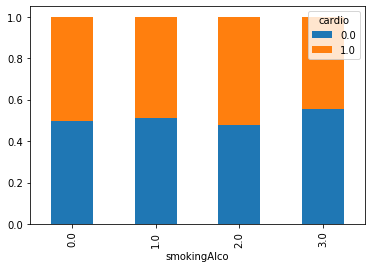

In [38]:
groupedBySmokingAlco = df.groupby(['smokingAlco']);
print(groupedBySmokingAlco);

# Cross tab smoking alcohol and 
crossTab = pd.crosstab(df['smokingAlco'], df['cardio']);
print(crossTab);
crossTab = crossTab.apply(lambda r: r/r.sum(), axis=1);
crossTab.plot.bar(stacked=True);


# neither = withDisease[(withDisease['smoke'] == 0) & (withDisease['alco'] == 0)];
# smokingOnly = withDisease[(withDisease['smoke'] == 1) & (withDisease['alco'] == 0)];
# alcoholOnly = withDisease[(withDisease['smoke'] == 0) & (withDisease['alco'] == 1)];
# smokingAndAlcohol = withDisease[(withDisease['smoke'] == 1) & (withDisease['alco'] == 1)];

# Bar Plot
# plot = pd.DataFrame({'col':['Neither', 'Smoking Only', 'Alcohol Only', 'Both Smoking and Alcohol'], 'val':[neither['id'].count(), smokingOnly['id'].count(), alcoholOnly['id'].count(), smokingAndAlcohol['id'].count()]});
#plot.plot.bar(x='col', y='val', rot=0);